## Identify Pair-Trading Opportunities

In [35]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import util_functions as uf

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [44]:
df_raw = pd.DataFrame()

In [45]:
stock_list = ['AAPL','TSLA','NVDA','GOOG','META','ADBE','AMZN','MSFT','KO']

In [46]:
for stock in stock_list:
    df_temp = uf.getdata(stock,'Adj Close')
    df_temp = df_temp[df_temp.index>='2024-01-01']
    df_raw[stock] = df_temp['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [48]:
df_raw = df_raw.dropna(axis=0) 

In [49]:
df_raw = df_raw.dropna(axis=1) 

## Cointegration

P value for the Augmented Dickey-Fuller Test for AAPL and GOOG = 0.02124895590569847
P value for the Augmented Dickey-Fuller Test for GOOG and AAPL = 0.02124895590569847
P value for the Augmented Dickey-Fuller Test for MSFT and KO = 0.03639134435821914
P value for the Augmented Dickey-Fuller Test for KO and MSFT = 0.03639134435821914


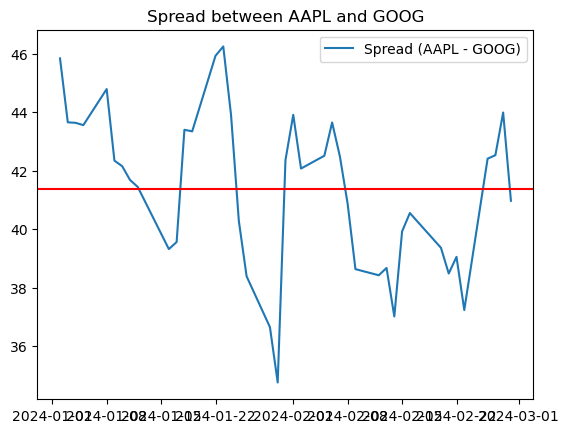

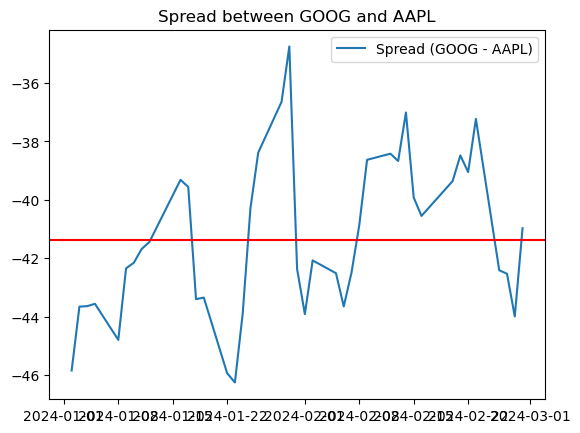

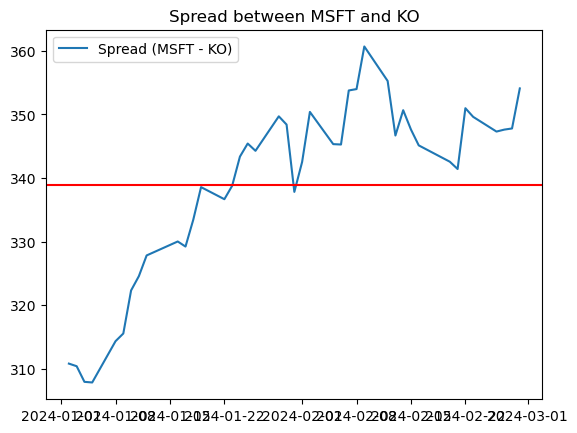

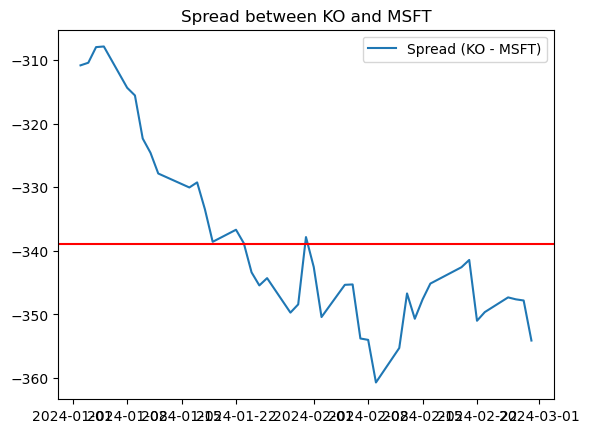

In [61]:
from statsmodels.tsa.stattools import adfuller

for stock1 in stock_list:
    for stock2 in stock_list:
        if stock1!=stock2:
            spread = df_raw[stock1] - df_raw[stock2]
            Spread_ADF = adfuller(spread)
            if Spread_ADF[1]<0.05:
                print('P value for the Augmented Dickey-Fuller Test for {} and {} = {}'.format(stock1, stock2, Spread_ADF[1]))
                
                # plot the spread
                fig, ax = plt.subplots()
                plt.plot(spread, label = 'Spread ({} - {})'.format(stock1, stock2))
                plt.axhline(spread.mean(), color='red')
                plt.legend()
                plt.title("Spread between {} and {}".format(stock1, stock2))


## Correlation

<Axes: >

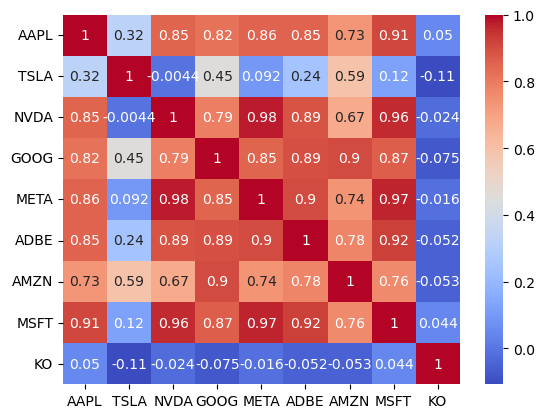

In [7]:
# Step 3: Compute correlation
correlation_matrix = df_raw.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [ ]:
# Also, we can take a look at the price ratios between the two time series.
ratio = df_raw[stock1] / df_raw[stock2]
plt.plot(ratio, label = 'Price Ratio ({} / {})'.format(stock1, stock2))
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between {} and {}".format(stock1, stock2))